# Crossfiltering using Altair

https://altair-viz.github.io/

In [1]:
import altair as alt

# remove when running on Colab or JupyterLab / add when running in a jupyter notebook
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Car insurance customer data

In [2]:
# Choose one of the two following data sets, the larger one gives better results, but might clutter the visualization depending on resolution

!curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-1500.csv
# !curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-300.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 26935  100 26935    0     0   128k      0 --:--:-- --:--:-- --:--:--  128k


In [3]:
import pandas as pd
# customers = pd.read_csv('./insurance-customers-300.csv', sep=';')
customers = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [4]:
customers.head()

,max speed,age,thousand km per year,group
0,148.0,44.0,25.0,1
1,168.0,54.0,24.0,1
2,161.0,26.0,34.0,0
3,137.0,25.0,10.0,2
4,164.0,38.0,22.0,1


## Interactive filtering to explore the data

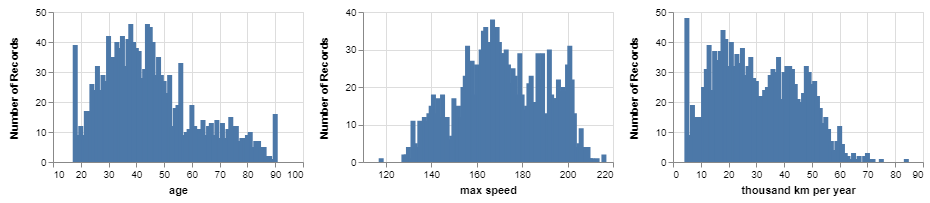

In [6]:
# https://altair-viz.github.io/gallery/interactive_layered_crossfilter.html

import altair as alt

brush = alt.selection(type='interval', encodings=['x'], resolve='intersect', empty='none')

# Define the base chart, with the common parts of the
# background and highlights
base = alt.Chart().mark_bar().encode(
    x=alt.X(alt.repeat('column'), type='quantitative'),
    y='count()'
).properties(
    width=250,
    height=150
)

# blue background with selection
background = base.properties(
    selection=brush
)

# yellow highlights on the transformed data
highlight = base.encode(
    color=alt.value('goldenrod')
).transform_filter(
    brush
)

# layer the two charts & repeat
alt.layer(
    background, highlight,
    data=customers
).repeat(
    column=["age", "max speed", "thousand km per year"]
)